In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('..')
import ugent
import schrodinger as sc

In [97]:
def V(x, y):
    return (x*x+1)*(y*y+1)

K = 4
n = 5

s = sc.Schrodinger2D(V, sc.Rectangle(-5.5,5.5, -5.5,5.5), gridSize=[n,n], maxBasisSize=K)
s.eigenvalues(10)

[2.9841751017709095,
 6.331259556066014,
 6.3312612791112475,
 7.776591457959299,
 7.81872141349938,
 11.871430421071938,
 14.481649396139323,
 14.481703782225186,
 16.40809241041469,
 16.4081089355045]

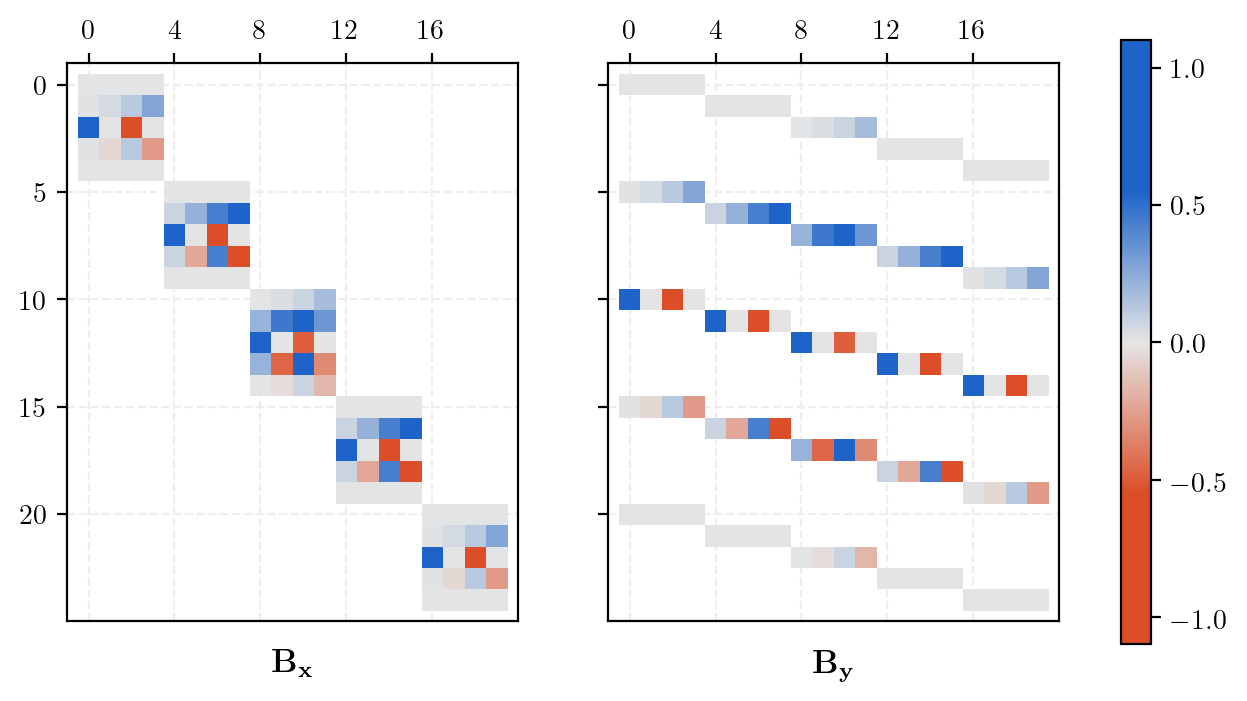

In [100]:
beta_x, beta_y = s.Beta()
vmax = max(1.1, np.max(np.abs(beta_x)), np.max(np.abs(beta_y)))

import matplotlib.colors as mc
from matplotlib import cm
rdbu = mc.LinearSegmentedColormap.from_list("ugent_RdBu", [
    ugent.rood, ugent.rood, np.array(ugent.wit)*0.9, ugent.blauw, ugent.blauw
])
rdbu.set_bad(color=tuple(ugent.wit)+(0,))

beta_x[beta_x == 0] = np.nan
beta_y[beta_y == 0] = np.nan

fig, axes = plt.subplots(nrows=1, ncols=2, dpi=200, figsize=(8, 4), sharey=True)

kwargs = dict(cmap=rdbu, vmin=-vmax, vmax=vmax, zorder=10)
for i, data in enumerate([beta_x, beta_y]):
    a = axes[i]
    l = 'x' if i == 0 else 'y'
    a.matshow(data, **kwargs)
    a.set_title(f"$\\vb{{B_{{{l}}}}}$", y=-0.12)
    a.set_xticks(range(0, n*K, K))
    a.set_yticks(range(0, n*n, n))
    a.grid(ls='--', c="#eee")
    a.set_xlim(-1, K*n)
    a.set_ylim(n*n, -1)
    a.xaxis.tick_top()


fig.colorbar(
    cm.ScalarMappable(norm=mc.Normalize(vmin=-vmax, vmax=vmax), cmap=rdbu),
    ax=axes,
    ticks=[-1,-.5,0,.5,1]
)

plt.savefig("new_method_beta.pdf", bbox_inches="tight")